Problem Statement:
You work in XYZ Company as a Python Developer. The company officials want
you to write code for a clustering problem.
Dataset: customers.csv
Tasks To Be Performed:
1. K-Means Clustering:
● Load customer data
● Check the number of cells in each column with null values
● Create a scatter plot with Age as X and Spending Score as Y
● Find out the best number for clusters between 1 and 10 (inclusive)
using the elbow method
● Draw a scatter plot displaying data points colored on the basis of
clusters

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load customer data from CSV
data = pd.read_csv('customers.csv')

# Check the number of cells with null values in each column
null_counts = data.isnull().sum()
print("Number of cells with null values:\n", null_counts)


Number of cells with null values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


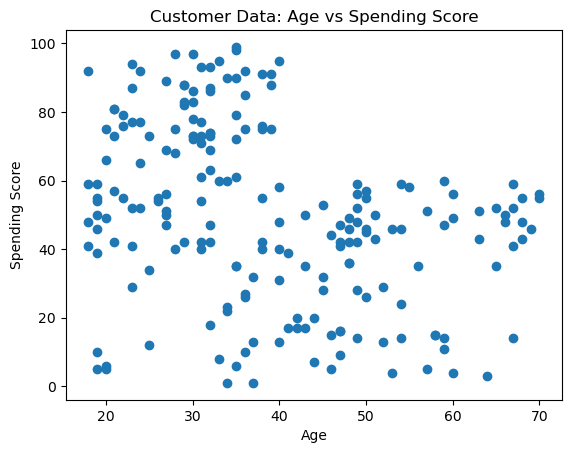

In [3]:
# Create scatter plot with Age as X and Spending Score as Y
plt.scatter(data['Age'], data['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Customer Data: Age vs Spending Score')
plt.show()

In [4]:
# Find the best number of clusters using the elbow method
distortions = []
K = range(1, 11)  # Number of clusters to try: 1 to 10
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data[['Age', 'Spending Score (1-100)']])
    distortions.append(kmeans.inertia_)

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less 

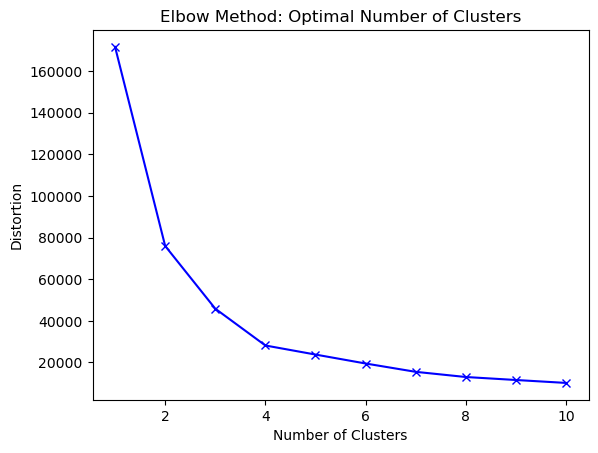

In [5]:
# Plot the elbow curve
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method: Optimal Number of Clusters')
plt.show()

In [6]:
# Perform K-Means clustering with the best number of clusters
best_k = 5  # Replace with the elbow method result
kmeans = KMeans(n_clusters=best_k)
kmeans.fit(data[['Age', 'Spending Score (1-100)']])


C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [7]:
# Assign cluster labels to data points
data['Cluster'] = kmeans.labels_

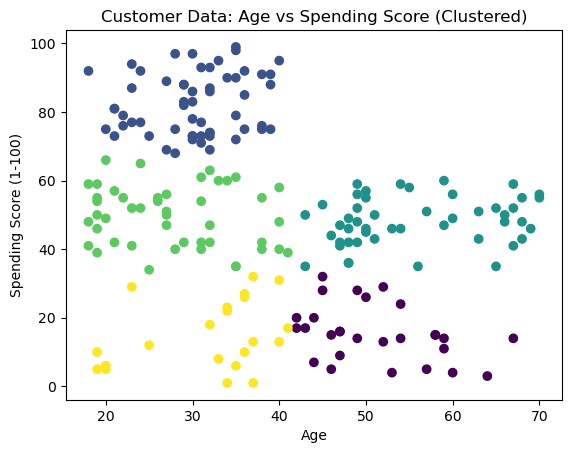

In [10]:
# Draw scatter plot colored on the basis of clusters
plt.scatter(data['Age'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Data: Age vs Spending Score (Clustered)')
plt.show()